                                        Оценка уровня ожирения на основе датасета 
Набор данных для оценки уровней ожирения на основе пищевых привычек и физического состояния у лиц из Колумбии, Перу и Мексики.

#### Атрибуты, связанные с привычками питания:
Частое потребление высококалорийной пищи (FAVC), 
частота потребления овощей (FCVC), 
количество основных приемов пищи (NCP), 
количество перекусов между основными приемами пищи (CAEC), 
ежедневное потребление воды (CH20)
потребления алкоголя (CALC). 
#### Атрибуты, связанные с физическим состоянием: 
мониторинг потребления калорий (SCC),
частота физической активности (FAF), 
время использования технологических устройств (TUE), 
использованный транспорт (MTRANS), 
#### Другими полученными переменными были: 
пол (Gender), 
возраст (Age), 
рост (Height) 
вес (Width) 

Наконец, все данные были помечены, и переменная класса NObesity была создана со значениями: 
* Недостаточный вес(0), 
* Нормальный вес(1), 
* Уровень избыточного веса I(2), 
* Уровень избыточного веса II(3), 
* Тип ожирения I(4), 
* Тип ожирения II(5),  
* Тип ожирения III(6), 

используя уравнение (1)

In [154]:
%%latex
\begin{equation}BMI = \frac{weight}{height^{2}} \end{equation}
Уравнение (1) 

<IPython.core.display.Latex object>

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

In [131]:
# загружаем датасет
df = pd.read_csv('ObesityDataSet.csv')
pd.core.frame.DataFrame

pandas.core.frame.DataFrame

In [132]:
#выводим первые 10 значений
pd.set_option("display.max.columns", None)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,Public_Transportation,1
1,Female,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,Public_Transportation,1
2,Male,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,Public_Transportation,1
3,Male,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,Walking,2
4,Male,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,Public_Transportation,6
2107,Female,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,Public_Transportation,6
2108,Female,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,Public_Transportation,6
2109,Female,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,Public_Transportation,6


Text(0, 0.5, 'Ожирение')

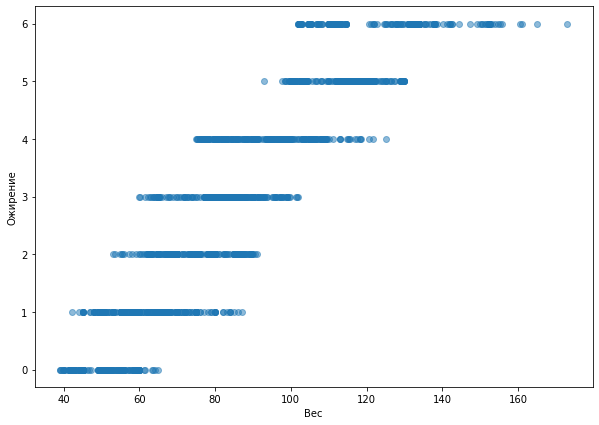

In [151]:
plt.figure(figsize=(10,7))
plt.scatter(df.Weight,df.BMI,alpha = 0.5)
plt.xlabel('Вес')
plt.ylabel('Ожирение')

# Линейная регрессия

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
model = LinearRegression()

In [144]:
X = pd.DataFrame(df.Weight)
Y = pd.DataFrame(df.BMI)

In [145]:
model.fit(X,Y)

LinearRegression()

In [146]:
#посмотрим коэффициент
model.coef_

array([[0.06921642]])

In [147]:
#и свободный коэффициент
model.intercept_

array([-2.88090828])

Text(0, 0.5, 'Ожирение')

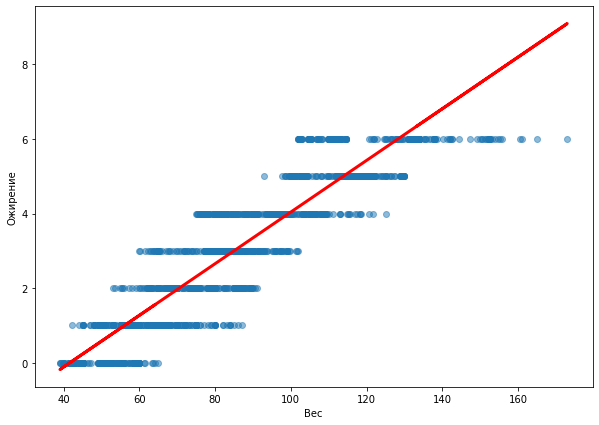

In [150]:
plt.figure(figsize=(10,7))
plt.scatter(df.Weight,df.BMI,alpha = 0.5)

plt.plot(X,model.predict(X), color = 'red',linewidth = 3)

plt.xlabel('Вес')
plt.ylabel('Ожирение')

In [149]:
#узнаем на сколько "правдивы" предсказания
model.score(X,Y)

0.8340270269255957

In [153]:
#попробуем предсказать нашу стадию ожирения при весе 80 кг
model.predict([[80]])

array([[2.65640567]])

# SVM

In [155]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split